# Descriptive Statistics

In [11]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


In [12]:
gt = pd.read_csv('CSVs/globalterrorism.csv')
display(gt.shape)
gt.head()

(43793, 19)

,iyear,imonth,iday,more_than_24h,country_txt,city,latitude,longitude,news,suicide,attacktype,attacktype_txt,targtype,targtype_txt,band_name,npeople_attacking,weapon,weapon_txt,nkill
0,1970,3,5,0,United States,San Juan,18.386932,-66.061127,3/5/1970: Unknown Puerto Rican Nationalists as...,0,1,Assassination,4,Military,Other,1,5,Firearms,2
1,1970,3,9,0,United States,Bel Air,39.538940,-76.348479,3/9/1970: A bomb exploded in the car of Ralph ...,0,3,Bombing/Explosion,20,Unknown,Other,2,6,Explosives,2
2,1970,3,20,0,United States,Detroit,42.331685,-83.047924,3/20/1970: Unknown perpetrators shot and kille...,0,1,Assassination,14,Private Citizens & Property,Other,7,5,Firearms,1
3,1970,4,24,0,United States,Baltimore,39.308342,-76.616104,4/24/1970: Three members of the Black Panthers...,0,2,Armed Assault,3,Police,Other,3,5,Firearms,1
4,1970,5,9,0,United States,Sacramento,38.551295,-121.471066,5/9/1970: Sacramento Police Officer Bernard Be...,0,2,Armed Assault,3,Police,Other,40,5,Firearms,1


In [13]:
gt.dtypes

iyear                  int64
imonth                 int64
iday                   int64
more_than_24h          int64
country_txt           object
city                  object
latitude             float64
longitude            float64
news                  object
suicide                int64
attacktype             int64
attacktype_txt        object
targtype               int64
targtype_txt          object
band_name             object
npeople_attacking      int64
weapon                 int64
weapon_txt            object
nkill                  int64
dtype: object

In [14]:
desc = gt[['npeople_attacking', 'nkill']].copy()
desc.describe()

,npeople_attacking,nkill
count,43793.000000,43793.000000
mean,13.376156,4.701025
std,44.069149,17.604601
min,1.000000,1.000000
25%,3.000000,1.000000
50%,6.000000,2.000000
75%,19.000000,4.000000
max,5000.000000,1570.000000


,iyear,imonth,iday,more_than_24h,latitude,longitude,suicide,attacktype,targtype,npeople_attacking,weapon,nkill
iyear,1.000000,-0.087005,0.012200,-0.010576,0.001671,0.093500,-0.000105,0.063306,-0.041899,0.023337,0.045109,-0.013061
imonth,-0.087005,1.000000,0.004321,-0.000827,0.013000,0.009918,0.002963,0.014004,0.003654,0.024997,0.010999,-0.001267
iday,0.012200,0.004321,1.000000,-0.012176,0.017640,0.018773,-0.001090,0.003899,-0.002798,-0.002205,-0.000235,-0.009590
more_than_24h,-0.010576,-0.000827,-0.012176,1.000000,-0.048072,-0.017486,-0.058486,0.259191,0.026309,0.066442,0.113201,0.057604
latitude,0.001671,0.013000,0.017640,-0.048072,1.000000,-0.010223,0.105877,0.031278,-0.012670,-0.033032,0.017108,-0.003853
longitude,0.093500,0.009918,0.018773,-0.017486,-0.010223,1.000000,-0.053155,-0.049843,-0.051201,-0.003362,-0.051449,-0.065184
suicide,-0.000105,0.002963,-0.001090,-0.058486,0.105877,-0.053155,1.000000,0.000110,-0.052566,-0.080658,-0.022006,0.120082
attacktype,0.063306,0.014004,0.003899,0.259191,0.031278,-0.049843,0.000110,1.000000,0.055661,0.041818,0.773809,0.062711
targtype,-0.041899,0.003654,-0.002798,0.026309,-0.012670,-0.051201,-0.052566,0.055661,1.000000,-0.001869,0.035225,0.016924
npeople_attacking,0.023337,0.024997,-0.002205,0.066442,-0.033032,-0.003362,-0.080658,0.041818,-0.001869,1.000000,0.029062,0.059401


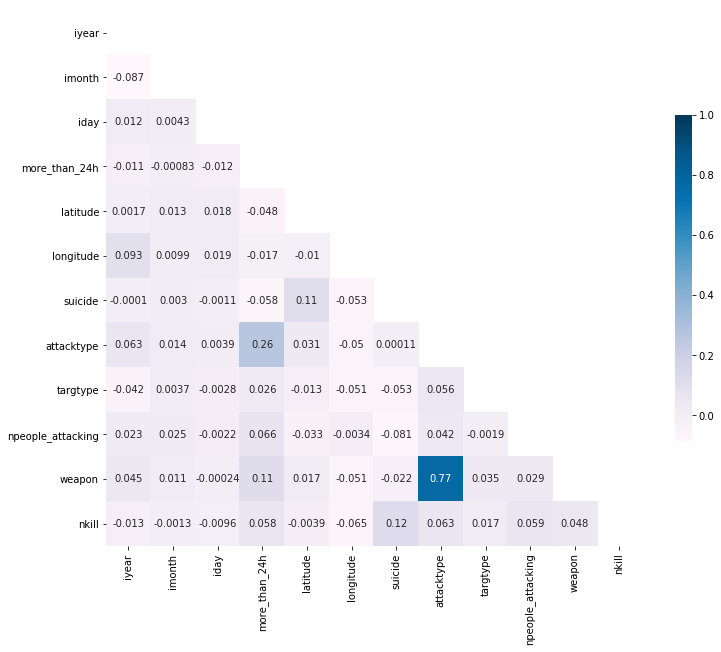

In [15]:
corr = gt.corr()
display(corr)


mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(12, 12))

sns.heatmap(corr, mask=mask, cmap='PuBu', square=True, cbar_kws={"shrink": .5}, annot=True)

Text(0.5, 0, 'Number of people')

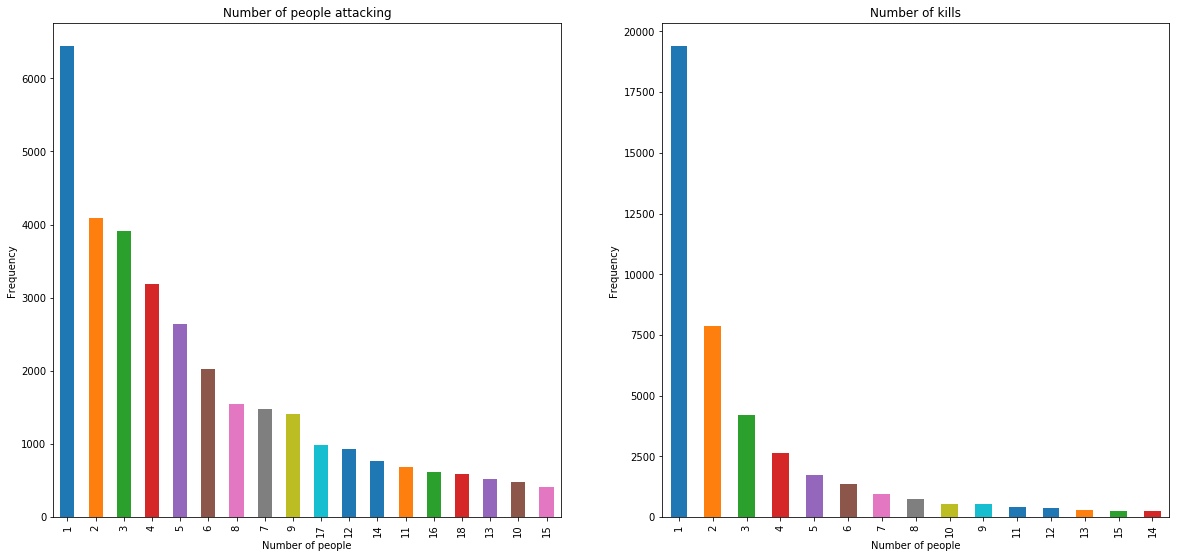

In [16]:
# Column-wise data distribution - is the distribution skewed? Yes, right-skewed

gtn = gt[gt['npeople_attacking'] < gt['npeople_attacking'].quantile(0.75)]
gtp = gt[gt['nkill'] < gt['nkill'].quantile(0.95)]

f, axs = plt.subplots(figsize=(20,20))

plt.subplot(2, 2, 1)
axs = gtn['npeople_attacking'].value_counts().plot(kind = 'bar')
plt.title('Number of people attacking')
plt.ylabel('Frequency')
plt.xlabel('Number of people')

plt.subplot(2, 2, 2)
axs = gtp['nkill'].value_counts().plot(kind = 'bar')
plt.title('Number of kills')
plt.ylabel('Frequency')
plt.xlabel('Number of people')

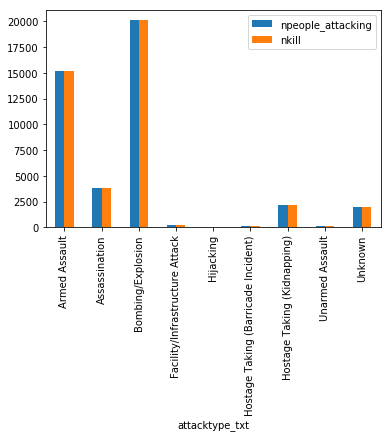

In [17]:
gt[["npeople_attacking", "nkill"]].groupby(gt['attacktype_txt']).count().plot.bar()

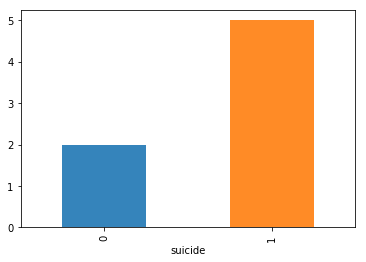

In [18]:
n_suicide = gt['nkill'].groupby(gt['suicide']).median().sort_values()
n_suicide.plot(kind = 'bar', alpha = 0.9)

Text(0.5, 0, 'Number of people (median)')

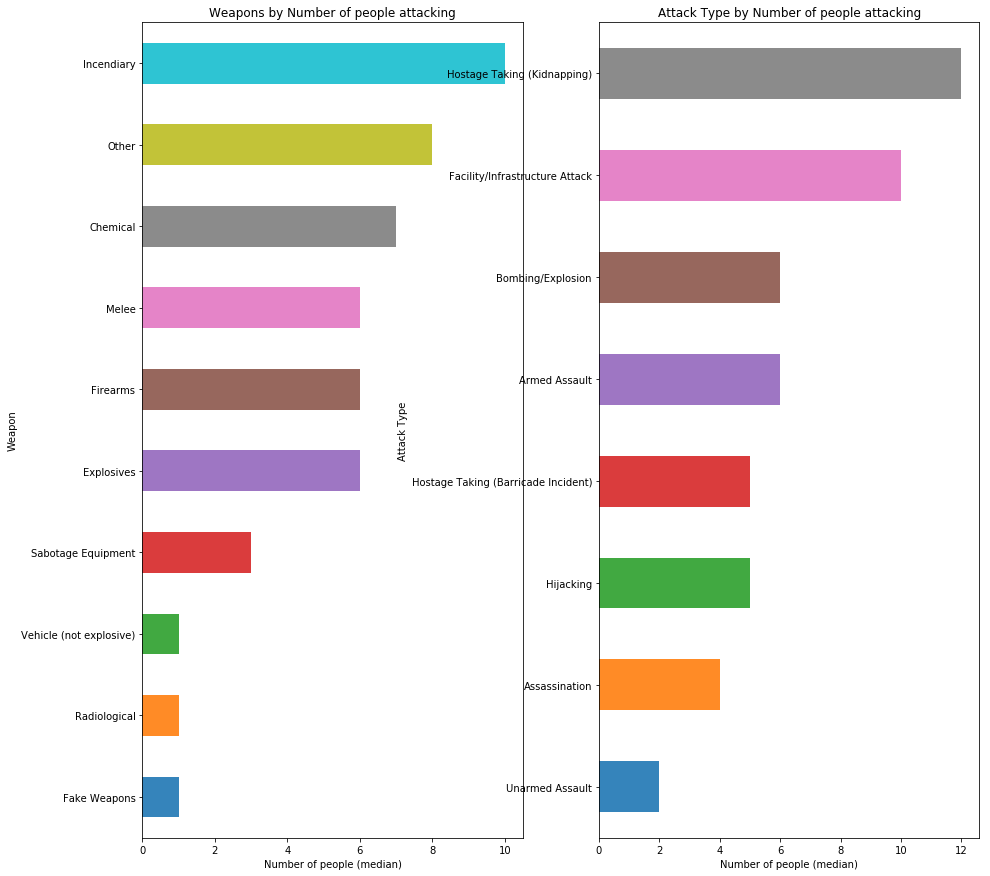

In [19]:
# Number of people attacking - Weapons & Attack Type 

gta = gt.drop(gt[gt.weapon_txt == 'Unknown'].index)
gtb = gt.drop(gt[gt.attacktype_txt == 'Unknown'].index)

f, axs = plt.subplots(figsize=(15,15))

plt.subplot(1, 2, 1)
axs = gta['npeople_attacking'].groupby(gta['weapon_txt']).median().sort_values().plot(kind = 'barh', alpha = 0.9)
plt.title('Weapons by Number of people attacking')
plt.ylabel('Weapon')
plt.xlabel('Number of people (median)')

plt.subplot(1, 2, 2)
axs = gtb['npeople_attacking'].groupby(gtb['attacktype_txt']).median().sort_values().plot(kind = 'barh', alpha = 0.9)
plt.title('Attack Type by Number of people attacking')
plt.ylabel('Attack Type')
plt.xlabel('Number of people (median)')

In [31]:
#gtc = gt.drop(gt['country_txt'].value_counts().tail(138)).copy()

#gtc[["iyear", "country_txt", "targtype"]].groupby(["iyear", "country_txt"]).unstack("country_txt").plot(figsize = (15, 10))



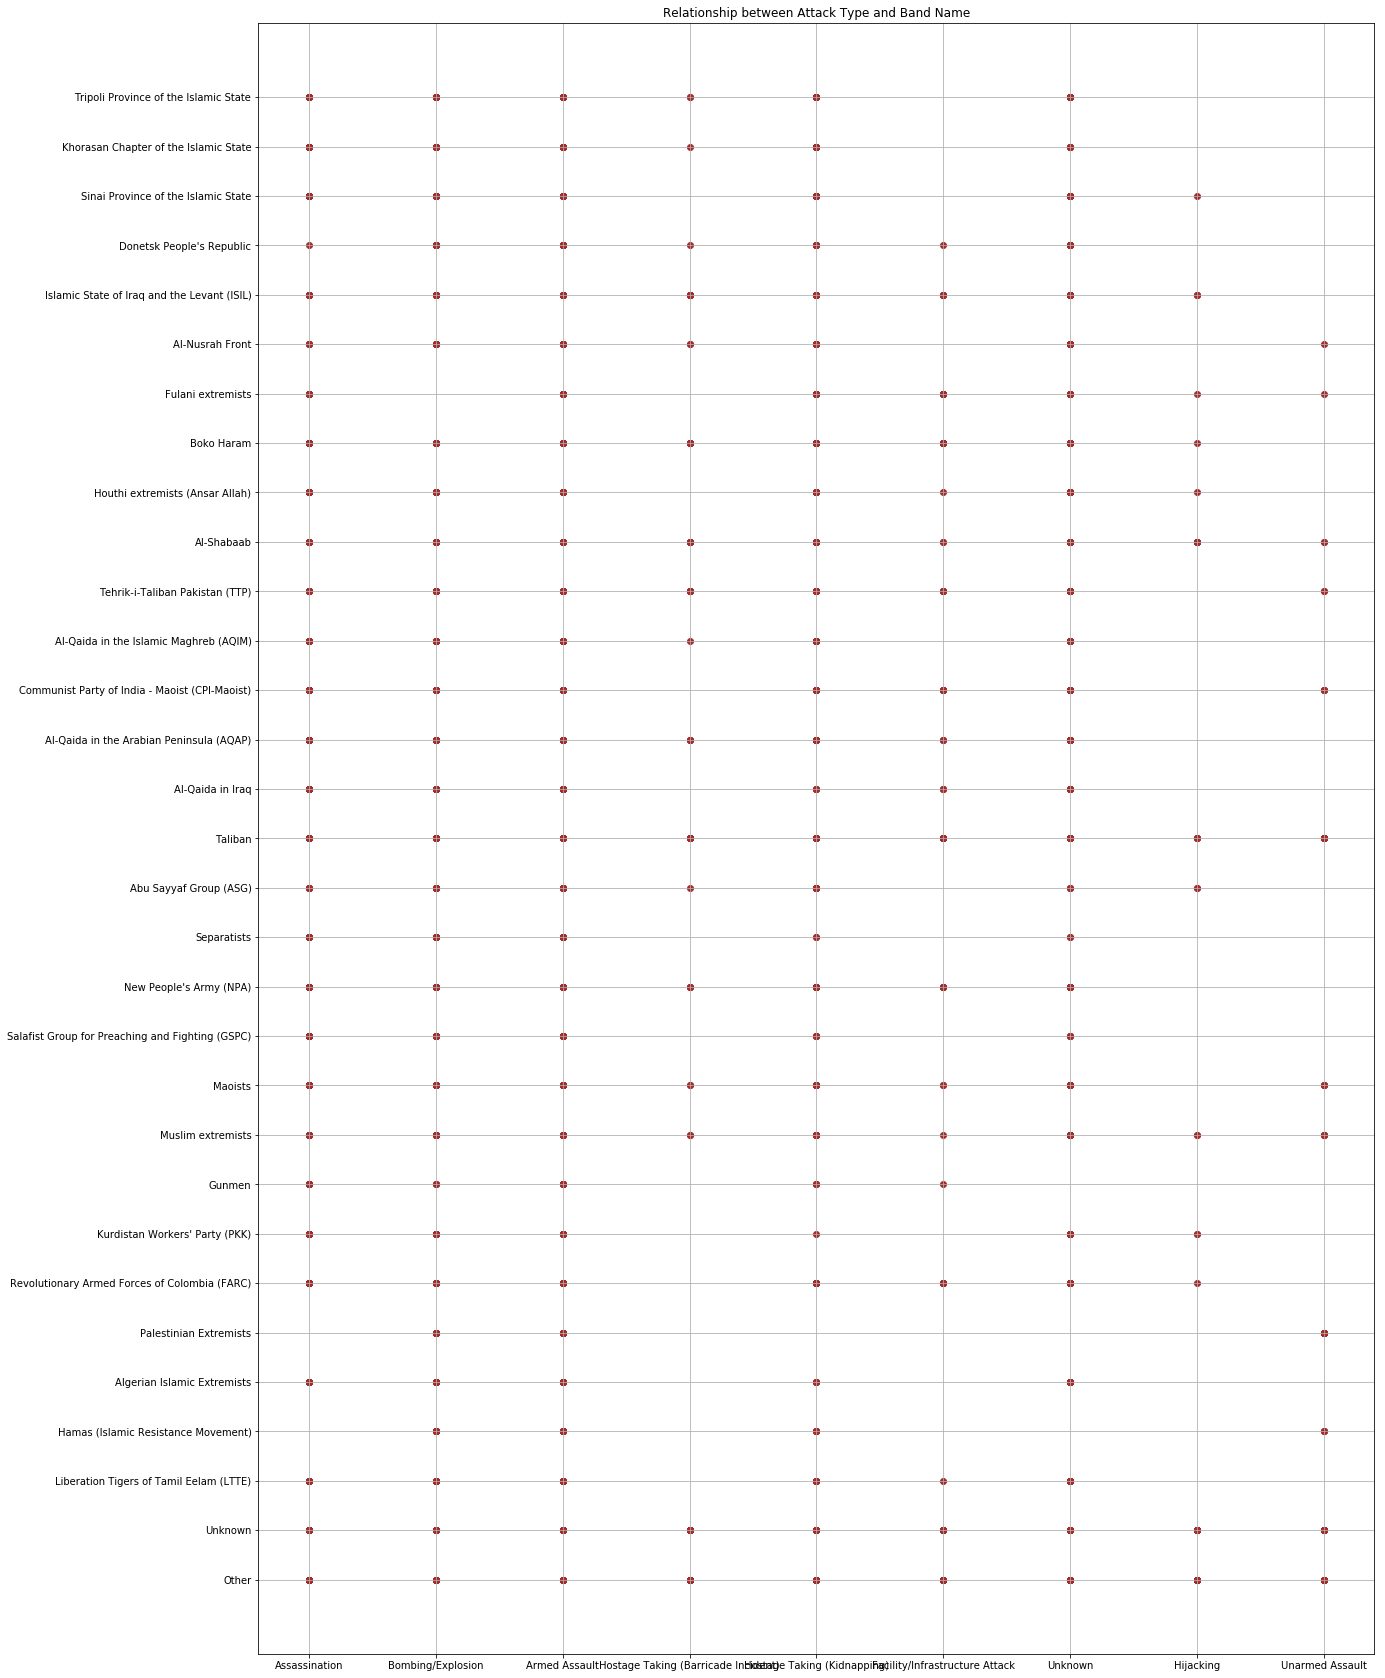

In [20]:
fig, axes = plt.subplots(figsize = (20,30))

plt.scatter(x = 'attacktype_txt', y = 'band_name', data = gt, color="brown")
#plt.ylabel("Age")
#plt.xlabel("Fare")
plt.title("Relationship between Attack Type and Band Name")
plt.grid()